# Visualise Image Example

This notebook demonstrates how to display an image along with some contours, scalar overlays and bounding boxes.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
"""
This 'ImageVisualiser' class does most of the heavy lifting regarding visualisation
It has a number of helpful functions, and makes adding additional information to an
image (relatively) pain-free
"""
from platipy.imaging import ImageVisualiser


"""
Import the usual suspects
"""

import numpy as np
import SimpleITK as sitk
from pathlib import Path
import matplotlib.pyplot as plt

from platipy.imaging.tests.data import get_lung_nifti

In [4]:
input_directory = get_lung_nifti()

2021-05-11 12:34:47.267 | DEBUG    | platipy.imaging.tests.data:get_lung_nifti:63 - Output directory exists, stopping. data


In [11]:
"""
Read in the data

ct_image : the x-ray computed tomography scan (3D)
contours : a dictionary of binary masks
"""

pat_directory = next(input_directory.glob("*"))

# Read in the CT image
ct_filename = next(pat_directory.glob("**/IMAGES/*.nii.gz"))
ct_image = sitk.ReadImage(ct_filename.as_posix())

# Read in the RTStruct contours as binary masks
contour_filename_list = list(pat_directory.glob("**/STRUCTURES/*.nii.gz"))

contours = {}
for contour_filename in contour_filename_list:
    _file = contour_filename.as_posix()
    _name = _file[_file.rfind("_")+1:-7]
    
    contours[_name] = sitk.ReadImage(contour_filename.as_posix())

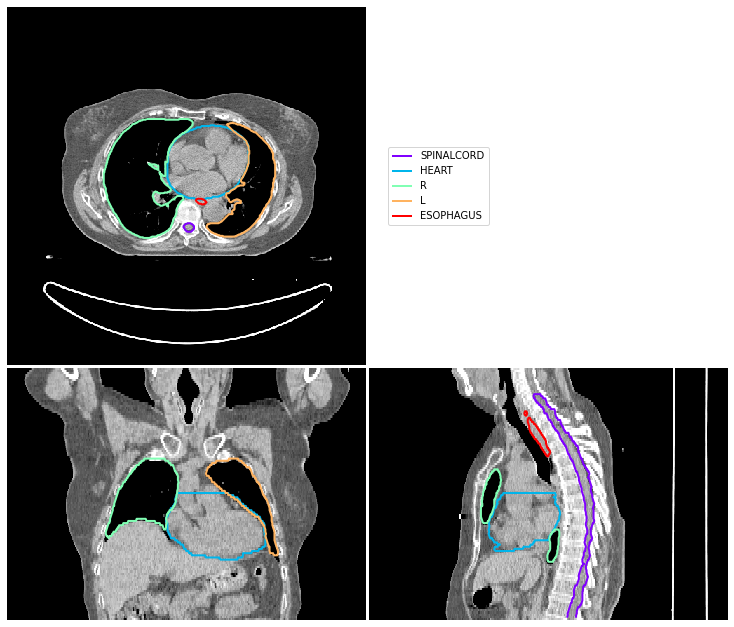

In [12]:
"""
Display the image with the contours

Here we define 'cut', the location of orthogonal slices

    cut : (
        transaxial slice location *or* first axis,
        coronal slice location *or* second axis,
        saggital slice location *or* third axis,
        )
    
"""

image_visualiser = ImageVisualiser(ct_image, cut=(50,200,256))
image_visualiser.add_contour(contours)
fig = image_visualiser.show()

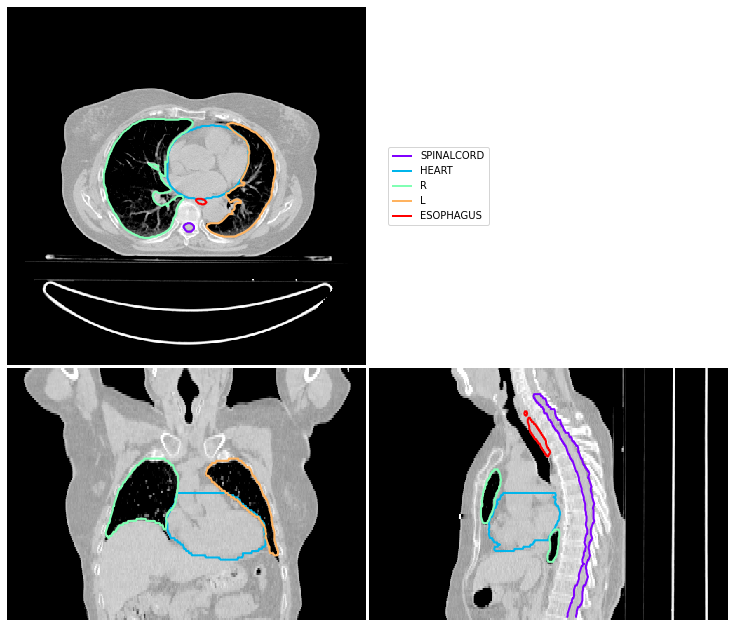

In [13]:
"""
Display the image with the contours

Here we change the intensity windowing, for example to better visualise lung tissue

window : (
    minimum intensity,
    range in intensity
    )
    
We 
    
"""

image_visualiser = ImageVisualiser(ct_image, cut=(50,200,256), window=(-700, 1100))
image_visualiser.add_contour(contours)
fig = image_visualiser.show()